<a href="https://colab.research.google.com/github/jainsarthak777/Laon-Prediction/blob/main/Email_Spam_Detection_Database_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import pandas as pd

In [149]:
df=pd.read_csv('/content/spam.csv',encoding ='latin-1')



In [150]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [151]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [152]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis =1,inplace=True)

In [153]:
import matplotlib.pyplot as plt

In [154]:
import seaborn as sns

In [155]:
df['v1'].value_counts()

,count
v1,
ham,4825
spam,747


In [156]:
label_df=df['v1'].value_counts().index

In [157]:
value_df=df['v1'].value_counts().values

([<matplotlib.patches.Wedge at 0x7d0f62142190>,
 [Text(-1.0038715425384215, 0.4497131597824666, 'ham'),
  Text(1.0038714746336121, -0.44971331136284726, 'spam')],
 [Text(-0.547566295930048, 0.24529808715407267, '86.59%'),
  Text(0.5475662588910611, -0.24529816983428027, '13.41%')])

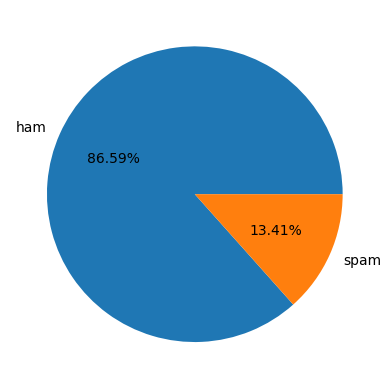

In [158]:
plt.pie(labels=label_df,x=value_df,autopct='%1.2f%%')

<Axes: xlabel='v1', ylabel='count'>

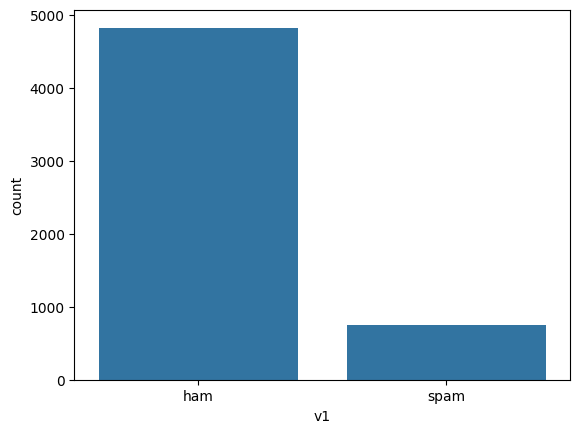

In [159]:
sns.countplot(x=df['v1'],data = df)

In [160]:
from sklearn.feature_extraction.text import CountVectorizer

In [161]:
vectorizer = CountVectorizer()

In [162]:
x = vectorizer.fit_transform(df['v2'])

In [163]:
x

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 73916 stored elements and shape (5572, 8672)>

In [164]:
x.shape

(5572, 8672)

In [165]:
from imblearn.over_sampling import SMOTE

In [166]:
sm = SMOTE(random_state=42)

In [167]:
y=df['v1']

In [168]:
X_res, y_res = sm.fit_resample(x, y)

In [169]:
X_res

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 180975 stored elements and shape (9650, 8672)>

In [170]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [171]:
y_res=le.fit_transform(y_res)

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [174]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [175]:
y_pred=clf.predict(X_test)

In [183]:
y_pred

array(['spam', 'ham', 'spam', ..., 'ham', 'ham', 'spam'], dtype='<U4')

In [177]:
from sklearn.metrics import accuracy_score

In [178]:
accuracy_score(y_test,y_pred)

0.9793365959760739

In [179]:
from sklearn.metrics import confusion_matrix

In [180]:
cn=confusion_matrix(y_test,y_pred)

<Axes: >

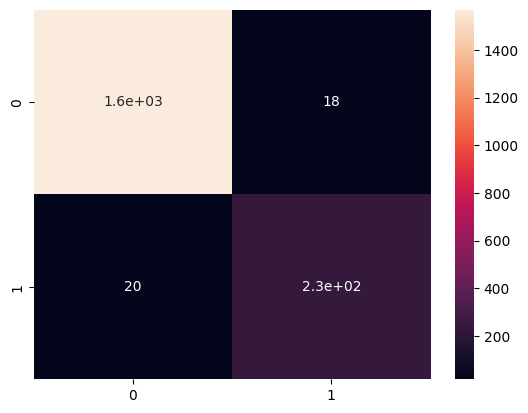

In [181]:
sns.heatmap(cn,annot=True)

In [184]:
from sklearn.metrics import classification_report

In [185]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1587
        spam       0.93      0.92      0.92       252

    accuracy                           0.98      1839
   macro avg       0.96      0.95      0.96      1839
weighted avg       0.98      0.98      0.98      1839

